In [14]:
import pandas as pd
import numpy as np
from tslearn import barycenters

In [7]:
test_df = pd.read_csv("../data/clustering/jan_mondays.csv")
test_df.rename(columns={'Unnamed: 0':'modified_index'}, inplace=True)
test_df.set_index('modified_index', inplace=True)
test_df.head()

,JMON-1:P_TOTAL_SJN,JMON-2:P_TOTAL_SJN,JMON-3:P_TOTAL_SJN,JMON-4:P_TOTAL_SJN
modified_index,,,,
00:00:00,13575.423,12882.394,12732.352,13160.015
00:15:00,13191.545,12714.635,12577.430,12933.261
00:30:00,13064.414,12476.851,12417.855,12733.229
00:45:00,12836.590,12314.395,12304.554,12434.646
01:00:00,12532.873,12120.047,12158.334,12285.742


<AxesSubplot: xlabel='modified_index'>

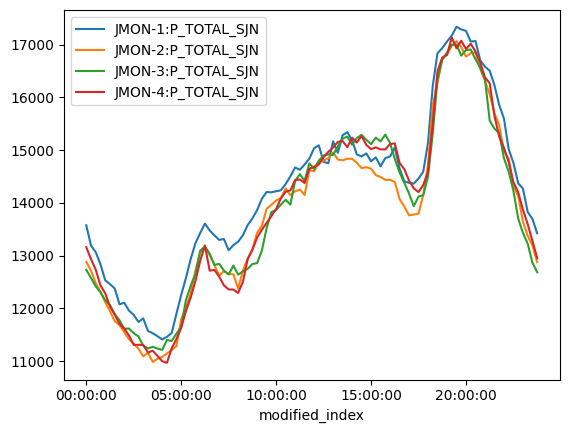

In [8]:
test_df.plot()

In [15]:
time_series = [[1, 2, 3, 4], [1, 2, 4, 5]] #each list is a column in my data
bar = barycenters.euclidean_barycenter(time_series)
bar.shape

(4, 1)

In [28]:
tstmp = np.array(time_series).T
dt_idx = pd.date_range(start="2/02/2016 8:00",freq="15 min",periods=4)
ts_df = pd.DataFrame(tstmp,columns=["X1","X2"],index=dt_idx)
ts_df.head()

,X1,X2
2016-02-02 08:00:00,1,1
2016-02-02 08:15:00,2,2
2016-02-02 08:30:00,3,4
2016-02-02 08:45:00,4,5
